# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [13]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [14]:
print("Описание набора данных:")
print(diabetes.DESCR)
print("\nНаименования признаков:")
print(diabetes.feature_names)

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [15]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Вывод первых 5 строк
print("Первые 5 строк набора данных:")
df.head() #По умолчанию выводит первые 5 строк

Первые 5 строк набора данных:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [16]:
# Информация о типах данных
print("Информация о типах данных:")
print(df.info())

# Проверка на наличие категориальных признаков
print("\nКатегориальные признаки:")
categorical_found = False
for column in df.columns:
    unique_count = df[column].nunique()

    if unique_count <= 10:
        if not categorical_found:
            categorical_found = True
        print(f"- {column}: {unique_count} уникальных значений")

if not categorical_found:
    print("Категориальные признаки не обнаружены")

# Проверка на наличие пропущенных значений (null)
print("\nПроверка на наличие пропущенных значений:")
print(df.isnull().sum())

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Категориальные признаки:
- sex: 2 уникальных значений

Проверка на наличие пропущенных значений:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## Исследование данных

4. Постройте матрицу корреляции.

In [17]:
matr = df.corr()
matr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

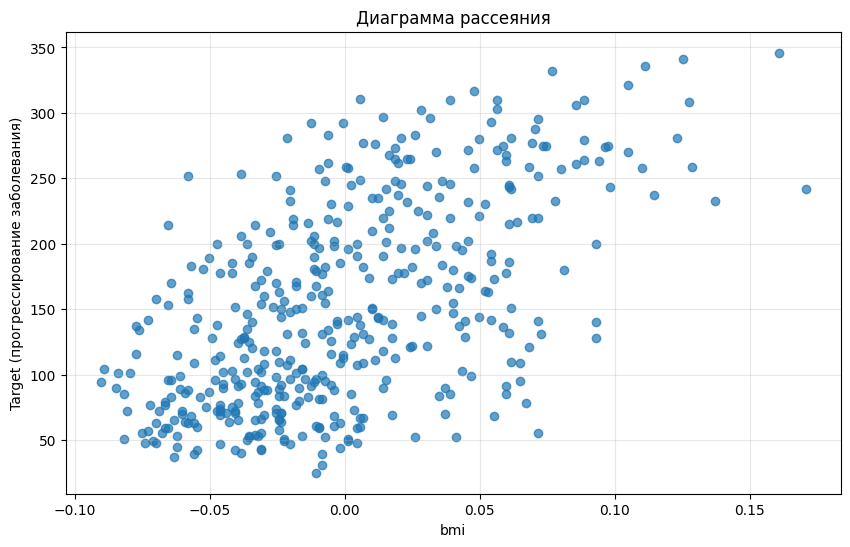

In [18]:
import seaborn as sns
# Находим признак с наибольшей корреляцией с целевой переменной
correlations = df.corr()['target'].abs().sort_values(ascending=False)
most_correlated_feature = correlations.index[1]  # index[0] - это сам target, поэтому берем index[1]

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df[most_correlated_feature], df['target'], alpha=0.7)
plt.title(f'Диаграмма рассеяния')
plt.xlabel(most_correlated_feature)
plt.ylabel('Target (прогрессирование заболевания)')
plt.grid(True, alpha=0.3)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [19]:
# Вычисляем корреляции с целевой переменной и сортируем по убыванию
correlations = df.corr()['target'].abs().sort_values(ascending=False)

# Выбираем 5 признаков с самой высокой корреляцией (исключая сам target)
top_5_features = correlations.index[1:6]  # index[0] - это target, берем следующие 5

print("5 признаков с самой высокой корреляцией с целевой переменной:")
for feature in top_5_features:
    print(f"- {feature}: {correlations[feature]:.3f}")

# Формируем наборы признаков (X) и целевой переменной (y)
X = df[top_5_features]
y = df['target']

print(f"\nНабор признаков X: {X.shape}")
print(f"Набор целевых значений y: {y.shape}")
print(f"\nПервые 5 строк набора X:")
print(X.head())

5 признаков с самой высокой корреляцией с целевой переменной:
- bmi: 0.586
- s5: 0.566
- bp: 0.441
- s4: 0.430
- s3: 0.395

Набор признаков X: (442, 5)
Набор целевых значений y: (442,)

Первые 5 строк набора X:
        bmi        s5        bp        s4        s3
0  0.061696  0.019907  0.021872 -0.002592 -0.043401
1 -0.051474 -0.068332 -0.026328 -0.039493  0.074412
2  0.044451  0.002861 -0.005670 -0.002592 -0.032356
3 -0.011595  0.022688 -0.036656  0.034309 -0.036038
4 -0.036385 -0.031988  0.021872 -0.002592  0.008142


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [20]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Размеры наборов данных после разделения:")
print(f"Обучающая выборка X: {X_train.shape}")
print(f"Обучающая выборка y: {y_train.shape}")
print(f"Тестовая выборка X: {X_test.shape}")
print(f"Тестовая выборка y: {y_test.shape}")

print(f"\nДоля тестовой выборки: {len(X_test) / len(X):.1%}")

Размеры наборов данных после разделения:
Обучающая выборка X: (331, 5)
Обучающая выборка y: (331,)
Тестовая выборка X: (111, 5)
Тестовая выборка y: (111,)

Доля тестовой выборки: 25.1%


8. Выполните обучение модели.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Получаем предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оцениваем качество модели
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Модель линейной регрессии успешно обучена!")
print("\nКоэффициенты модели:")
for feature, coef in zip(top_5_features, model.coef_):
    print(f"- {feature}: {coef:.3f}")
print(f"Свободный член: {model.intercept_:.3f}")

print("\nКачество модели:")
print(f"Обучающая выборка - MSE: {train_mse:.2f}, R²: {train_r2:.3f}")
print(f"Тестовая выборка - MSE: {test_mse:.2f}, R²: {test_r2:.3f}")

# Пример предсказания для первых 5 тестовых образцов
print("\nПримеры предсказаний (первые 5 тестовых образцов):")
for i in range(5):
    print(f"Реальное значение: {y_test.iloc[i]:.1f}, Предсказание: {y_test_pred[i]:.1f}")

Модель линейной регрессии успешно обучена!

Коэффициенты модели:
- bmi: 583.874
- s5: 456.075
- bp: 331.785
- s4: -166.138
- s3: -358.641
Свободный член: 151.694

Качество модели:
Обучающая выборка - MSE: 3068.93, R²: 0.492
Тестовая выборка - MSE: 2892.78, R²: 0.477

Примеры предсказаний (первые 5 тестовых образцов):
Реальное значение: 219.0, Предсказание: 145.0
Реальное значение: 70.0, Предсказание: 176.5
Реальное значение: 202.0, Предсказание: 164.0
Реальное значение: 230.0, Предсказание: 257.3
Реальное значение: 111.0, Предсказание: 133.5


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [22]:
from sklearn.metrics import mean_squared_error

# Вычисляем RMSE для обучающей и тестовой выборок
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error (RMSE):")
print(f"Обучающая выборка: {train_rmse:.2f}")
print(f"Тестовая выборка: {test_rmse:.2f}")

# Сравниваем RMSE со средним значением целевой переменной
mean_target = y.mean()
print(f"\nСреднее значение целевой переменной: {mean_target:.2f}")
print(f"RMSE тестовой выборки составляет {test_rmse/mean_target*100:.1f}% от среднего значения целевой переменной")

Root Mean Squared Error (RMSE):
Обучающая выборка: 55.40
Тестовая выборка: 53.78

Среднее значение целевой переменной: 152.13
RMSE тестовой выборки составляет 35.4% от среднего значения целевой переменной


10. Расчитайте R² (коэффициент детерминации)

In [23]:
print(f"R²: обучающая {r2_score(y_train, y_train_pred)}, тестовая {r2_score(y_test, y_test_pred)}")

R²: обучающая 0.4922880432488874, тестовая 0.4768642138880054


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?